In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numba import jit

g = 9.81
l = 1
gamma = 0.02
beta = 0.005

theta_0 = 0.2
theta_dot_0 = -0.1
phi_0 = 0.4
phi_dot_0 = -0.2

variable_list_0 = [theta_0, theta_dot_0, phi_0, phi_dot_0]

In [2]:
@jit(nopython=True)
def equations(t, variable_list):

    theta, theta_dot, phi, phi_dot = variable_list

    matrix_A = np.array([[1+2*beta*(1-np.cos(phi)), -beta*(1-np.cos(phi))],
                         [beta*(1-np.cos(phi)),     -beta                ]])
    
    vector_B = np.array([-beta*np.sin(phi)*(phi_dot**2-2*theta_dot*phi_dot),
                         beta*theta_dot**2*np.sin(phi)                     ])
                         
    vector_C = np.array([beta*g/l*(np.sin(theta-phi-gamma)-np.sin(theta-gamma)-g/l*np.sin(theta-gamma)),
                         beta*g/l*np.sin(theta-phi-gamma)])

    # theta_ddot, phi_ddot = np.linalg.solve(matrix_A, -vector_B-vector_C)
    theta_ddot,phi_ddot=np.linalg.inv(matrix_A)@(-vector_B-vector_C)
    return np.array([theta_dot, theta_ddot, phi_dot, phi_ddot])

In [3]:
def heelstrike_event_and_change_defination(t, variable_list):

     theta, theta_dot, phi, phi_dot = variable_list

     matrix_Change = np.array([[-1, 0,                                   0, 0],
                               [0,  np.cos(2*theta),                     0, 0],
                               [-2, 0,                                   0, 0],
                               [0,  np.cos(2*theta)*(1-np.cos(2*theta)), 0, 0]])
     
     # result_matrix = np.dot(matrix_Change, variable_matrix)
     # result_matrix = np.dot(matrix_Change, variable_matrix)
     result_matrix = matrix_Change @ variable_list



     return result_matrix
def monitor(t, variable_list):
    theta, theta_dot, phi, phi_dot = variable_list
#     print(f"t = {t}, phi - 2*theta = {phi - 2*theta}")
    print(f"t = {t} \n phi = {phi} \n theta = {theta} \n phi - 2*theta = {phi - 2*theta}\n")

    return phi - 2*theta

In [4]:
#向前euler法
variable_list_0=np.array(variable_list_0)
tmin=0
tmax=100
p=10000
dt=(tmax-tmin)/p
x=variable_list_0
sol=[]
mo=[]
evh=monitor(0,x)
for t in np.linspace(tmin,tmax,p):
    x=x+equations(t,x)*dt
    ev=monitor(t,x)
    if ev*evh<0:
        x=heelstrike_event_and_change_defination(t,x)
    evh=ev
    sol.append(x)
    mo.append(ev)
sol=np.array(sol)
mo=np.array(mo)
    

t = 0 
 phi = 0.4 
 theta = 0.2 
 phi - 2*theta = 0.0

t = 0.0 
 phi = 0.398 
 theta = 0.199 
 phi - 2*theta = 0.0

t = 0.010001000100010001 
 phi = 0.3957871327147831 
 theta = 0.1980104708270981 
 phi - 2*theta = -0.00023380893941310488

t = 0.020002000200020003 
 phi = 0.3933623332832639 
 theta = 0.19703135784199627 
 phi - 2*theta = -0.0007003824007286163

t = 0.030003000300030003 
 phi = 0.39072675024243697 
 theta = 0.19606260621269342 
 phi - 2*theta = -0.0013984621829498667

t = 0.040004000400040006 
 phi = 0.38788174479024007 
 theta = 0.1951041609007809 
 phi - 2*theta = -0.0023265770113217177

t = 0.05000500050005001 
 phi = 0.3848288898732331 
 theta = 0.19415596664671003 
 phi - 2*theta = -0.0034830434201869598

t = 0.060006000600060005 
 phi = 0.3815699690978134 
 theta = 0.19321796795414048 
 phi - 2*theta = -0.004865966810467581

t = 0.07000700070007002 
 phi = 0.37810697546358646 
 theta = 0.19229010907349053 
 phi - 2*theta = -0.006473242683394609

t = 0.080008000800

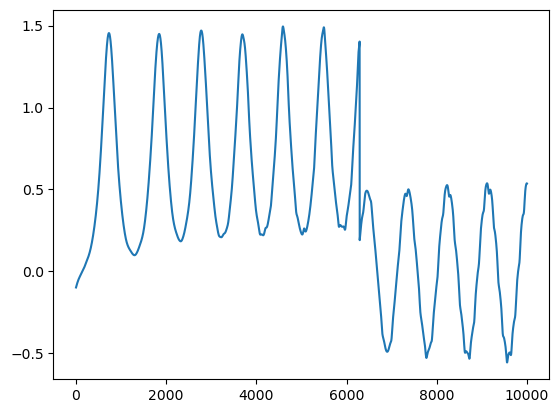

In [5]:
plt.plot(sol[:,1])
